### 1 : Importing Libraries

In [1]:
# ignore the warnings in the output
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 84.2 MB/s eta 0:00:00

In [5]:
# import libraries and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import mlflow
from pycaret.classification import *

 ### 2 Reading Data

In [10]:
%%time

##Copy the cleaned data obtained from the data_cleaning notebook into the Data folder before proceeding
dataset = pd.read_csv('heart.csv')

CPU times: user 4.61 ms, sys: 76 µs, total: 4.69 ms
Wall time: 5.67 ms


In [11]:
dataset.head()

age  sex  chest_pain_type  resting_bp  cholestoral  fasting_blood_sugar  \
0   63    1                3         145          233                    1   
1   37    1                2         130          250                    0   
2   41    0                1         130          204                    0   
3   56    1                1         120          236                    0   
4   57    0                0         120          354                    0   

   restecg  max_hr  exang  oldpeak  slope  num_major_vessels  thal  target  
0        0     150      0      2.3      0                  0     1       1  
1        1     187      0      3.5      0                  0     2       1  
2        0     172      0      1.4      2                  0     2       1  
3        1     178      0      0.8      2                  0     2       1  
4        1     163      1      0.6      2                  0     2       1

In [12]:
# create a connection and setup a SQLite database
import sqlite3
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

if __name__ == '__main__':
    create_connection("Heart_Disease_model_experimentation.db")

2.6.0


In [ ]:
# create a mlflow tracking uri at "http://0.0.0.0:6007"

mlflow.set_tracking_uri("http://0.0.0.0:6007")

In [ ]:
# setup pycaret 
exp_lead_scoring = setup(data=dataset, target = 'target',  
                   fold_shuffle=True, 
                   session_id = 42,
                   normalize = True, 
                   transformation = True, 
                   remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                   log_experiment=True,experiment_name='Heart_Disease_model_experimentation',
                   log_plots=True, log_data=True,
                   silent=True, verbose=True)

2022/12/18 12:37:23 INFO mlflow.tracking.fluent: Experiment with name 'Heart_Disease_model_experimentation' does not exist. Creating a new experiment.


### 4 : Model Experimentation with pycaret

In [ ]:
best_model = compare_models(fold = 10)

In [ ]:
# create a model which gives the highest accuracy

lr = create_model('lr')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


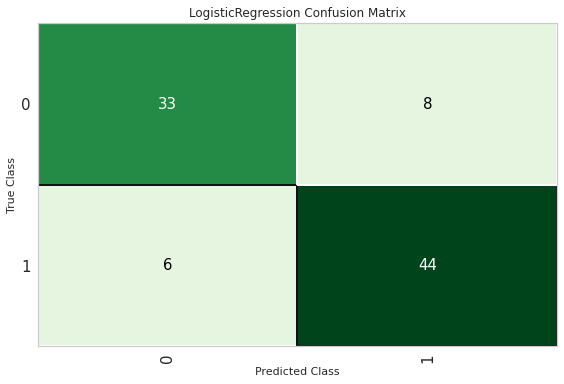

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warn

In [ ]:
# create feature importance plot
plot_model(lr, plot='confusion_matrix')

In [ ]:
!pip install optuna

  Using cached optuna-3.0.4-py3-none-any.whl (348 kB)
  Using cached cliff-4.1.0-py3-none-any.whl (81 kB)
  Using cached scipy-1.8.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.6 MB)
  Using cached cmaes-0.9.0-py3-none-any.whl (23 kB)
  Using cached stevedore-4.1.1-py3-none-any.whl (50 kB)
  Using cached cmd2-2.4.2-py3-none-any.whl (147 kB)
  Using cached autopage-0.5.1-py3-none-any.whl (29 kB)
  Using cached pyperclip-1.8.2-py3-none-any.whl
  Using cached pbr-5.11.0-py2.py3-none-any.whl (112 kB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.3
    Uninstalling scipy-1.5.3:
      Successfully uninstalled scipy-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires sklearn, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.22.2 which is incompatible.


In [ ]:
# Tune the hyper parameters of the lr model using optuna on 10 folds and optimise AUC as that was our system metric, 
# hence we will optimise AUC

tuned_lr_optuna,tuner_1 = tune_model(lr, 
                                   search_library = 'optuna',
                                   fold = 10,
                                   optimize = 'auc',
                                   choose_better = True, 
                                   return_tuner=True)

In [ ]:
# Print the final models configuration so that we can use it in the model retraining pipeline 
print(tuned_lr_optuna)

LogisticRegression(C=0.7781946997727404, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was dep